In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 11 #

## Grouping with Multiple Variables ##

In [2]:
cones = Table.read_table('cones.csv')
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [3]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [4]:
cones.group('Flavor', list)

Flavor,Color list,Price list
bubblegum,['pink'],[4.75]
chocolate,"['light brown', 'dark brown', 'dark brown']","[4.75, 5.25, 5.25]"
strawberry,"['pink', 'pink']","[3.55, 5.25]"


In [5]:
cones.group('Flavor', min)

Flavor,Color min,Price min
bubblegum,pink,4.75
chocolate,dark brown,4.75
strawberry,pink,3.55


In [6]:
cones.group('Flavor', np.average)

Flavor,Color average,Price average
bubblegum,,4.75
chocolate,,5.08333
strawberry,,4.4


In [7]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [8]:
cones.group(['Flavor','Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [9]:
survey = Table.read_table('welcome_survey.csv')
survey

Extraversion,Number of Texters,Hours of Sleep,Pant Leg Order,Handedness,Undergrad Year
5,3,7,Right leg in first,Right-handed,First
1,2,7.5,Left leg in first,Right-handed,Second
4,5,6,Left leg in first,Right-handed,Third
8,3,7,Left leg in first,Right-handed,Third
3,2,6,I don't know,Right-handed,Third
3,4,8,Right leg in first,Right-handed,Fourth or Higher
2,0,10,I don't know,Right-handed,Fourth or Higher
7,6,6,Right leg in first,Right-handed,First
5,4,8,Left leg in first,Right-handed,Third
5,5,8,Left leg in first,Right-handed,Third


In [10]:
survey.group('Undergrad Year', np.average)

Undergrad Year,Extraversion average,Number of Texters average,Hours of Sleep average,Pant Leg Order average,Handedness average
First,5.82363,8.21164,7.07363,,
Fourth or Higher,5.26061,5.57576,7.13333,,
Second,5.77083,7.075,7.08385,,
Third,5.53361,6.13866,7.12605,,


In [11]:
survey.group(['Handedness','Pant Leg Order'])

Handedness,Pant Leg Order,count
Ambidextrous / It's Complicated,I don't know,4
Ambidextrous / It's Complicated,Left leg in first,10
Ambidextrous / It's Complicated,Right leg in first,9
Left-handed,I don't know,20
Left-handed,Left leg in first,58
Left-handed,Right leg in first,44
Right-handed,I don't know,198
Right-handed,Left leg in first,416
Right-handed,Right leg in first,691


In [12]:
survey.group(['Handedness','Pant Leg Order'], np.average)

Handedness,Pant Leg Order,Extraversion average,Number of Texters average,Hours of Sleep average,Undergrad Year average
Ambidextrous / It's Complicated,I don't know,5,6.25,6.5,
Ambidextrous / It's Complicated,Left leg in first,5.4,6.5,7.15,
Ambidextrous / It's Complicated,Right leg in first,6.22222,6.44444,6.83333,
Left-handed,I don't know,5.45,6.8,7.1,
Left-handed,Left leg in first,6.06897,6.63793,7.23276,
Left-handed,Right leg in first,5.86364,8.31818,7.10227,
Right-handed,I don't know,5.16667,6.40404,7.15657,
Right-handed,Left leg in first,5.69471,7.40625,7.15505,
Right-handed,Right leg in first,5.81187,7.3068,7.02967,


In [13]:
survey.group('Handedness','Pant Leg Order', np.average)

TypeError: group() takes from 2 to 3 positional arguments but 4 were given

## Pivot Tables ##

In [14]:
survey.pivot('Pant Leg Order', 'Handedness')

Handedness,I don't know,Left leg in first,Right leg in first
Ambidextrous / It's Complicated,4,10,9
Left-handed,20,58,44
Right-handed,198,416,691


In [15]:
survey.pivot('Pant Leg Order', 'Handedness', values='Extraversion', collect=np.average)

Handedness,I don't know,Left leg in first,Right leg in first
Ambidextrous / It's Complicated,5,5.4,6.22222
Left-handed,5.45,6.06897,5.86364
Right-handed,5.16667,5.69471,5.81187


In [16]:
survey.group('Pant Leg Order', np.average)

Pant Leg Order,Extraversion average,Number of Texters average,Hours of Sleep average,Handedness average,Undergrad Year average
I don't know,5.18919,6.43694,7.13964,,
Left leg in first,5.73347,7.29545,7.16426,,
Right leg in first,5.81989,7.35618,7.03159,,


In [19]:
cones.pivot('Flavor', 'Color', values = 'Price', collect=np.average)

Color,bubblegum,chocolate,strawberry
dark brown,0,5.25,0
light brown,0,4.75,0
pink,4.75,0,4.4


## Joins ##

In [20]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Latte',    'Nefeli',  3],
    ['Espresso', "Abe's",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Latte,Nefeli,3
Espresso,Abe's,2


In [21]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Tea One', 'Nefeli', 'Tea One')
)
discounts

Coupon % off,Location
25,Tea One
50,Nefeli
5,Tea One


In [24]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


In [26]:
combined.with_column('Discounted Price', 
                    combined.column('Price') * (1 - combined.column('Coupon % off') / 100))

Cafe,Drink,Price,Coupon % off,Discounted Price
Nefeli,Espresso,2,50,1
Nefeli,Latte,3,50,1.5
Tea One,Milk Tea,4,25,3
Tea One,Milk Tea,4,5,3.8


In [27]:
drinks.join('Cafe', drinks)

Cafe,Drink,Price,Drink_2,Price_2
Abe's,Espresso,2,Espresso,2
Nefeli,Espresso,2,Espresso,2
Nefeli,Espresso,2,Latte,3
Nefeli,Latte,3,Espresso,2
Nefeli,Latte,3,Latte,3
Tea One,Milk Tea,4,Milk Tea,4


## Table Manipulation Examples ##

In [28]:
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [58]:
starters_g = nba.drop('PLAYER').group(['POSITION', 'TEAM'], max)
starters_g

POSITION,TEAM,SALARY max
C,Atlanta Hawks,12
C,Boston Celtics,2.61698
C,Brooklyn Nets,1.3629
C,Charlotte Hornets,13.5
C,Chicago Bulls,13.4
C,Cleveland Cavaliers,14.2609
C,Dallas Mavericks,5.2
C,Denver Nuggets,5.6135
C,Detroit Pistons,6.5
C,Golden State Warriors,13.8


In [41]:
starters_p = nba.pivot('POSITION','TEAM', values='SALARY', collect=max)

In [60]:
starters_g = starters_g.drop('POSITION').group('TEAM', sum).sort('SALARY max sum', descending=True)

ValueError: label "SALARY max sum" not in labels ('TEAM', 'SALARY max sum sum')

In [45]:
starters_p.with_column('TOTAL', starters_p.drop('TEAM').apply(sum))

TEAM,C,PF,PG,SF,SG,TOTAL
Atlanta Hawks,12,18.6717,8,4,5.74648,48.4181
Boston Celtics,2.61698,5,7.73034,6.79612,3.42551,25.5689
Brooklyn Nets,1.3629,11.236,6.3,24.8949,3.42551,47.2192
Charlotte Hornets,13.5,7,12,6.3314,13.1253,51.9567
Chicago Bulls,13.4,5.54373,20.0931,2.38044,16.4075,57.8247
Cleveland Cavaliers,14.2609,19.689,16.4075,22.9705,8.98876,82.3166
Dallas Mavericks,5.2,15.4937,5.37897,15.3615,1.449,42.8832
Denver Nuggets,5.6135,11.236,4.345,14,1.58448,36.7789
Detroit Pistons,6.5,0,13.913,2.84196,6.27,29.525
Golden State Warriors,13.8,14.2609,11.3708,11.7105,15.501,66.6431


In [ ]:
# CHALLENGE QUESTION: for each team,
# amount paid to "starter" (player earning the most) in each position


In [ ]:
# CHALLENGE QUESTION: for each team,
# total amount paid to all "starters"


In [50]:
standings = Table.read_table('nba_standings.csv')
standings.set_format('Percentage', PercentFormatter).show(3)

Conference,Team,Wins,Losses,Percentage
Eastern,Cleveland Cavaliers,57,25,69.50%
Eastern,Toronto Raptors,56,26,68.30%
Eastern,Miami Heat,48,34,58.50%


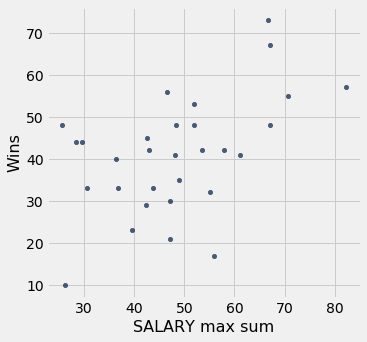

In [54]:
starters_g.join('TEAM', standings, 'Team').scatter('SALARY max sum', 'Wins')